## Set Neural Network Hyperparameters
This notebook configures the suite of possible neural network architectures for cmass.infer

In [4]:
import numpy as np
from tqdm import tqdm
import yaml
import matplotlib.pyplot as plt

In [5]:
# set model hyperpriors
models = [
    'mdn',
    'cnf',
    'maf',
    'nsf',
    # 'ncsf', # only for -pi,pi
    'nice',
    'gf',
    # 'sospf',# takes too long to sample
    # 'naf',  # takes too long to sample
    # 'unaf'  # takes too long to sample
]

# ranges set [min, max)
hidden_features = 10, 33
components = 1, 11
transforms = 2, 8

# set embedding hyperpriors
fcn_depth = 0, 4
fcn_width = 16, 65

# set random seed
seed = 0

In [6]:
Nmodels = 1000
np.random.seed(seed)

model_cfgs = []
for i in tqdm(range(Nmodels)):
    m = np.random.choice(models)
    hf = np.random.randint(*hidden_features)
    m, hf = str(m), int(hf)

    cfg = dict(model=m, hidden_features=hf, _idx=i)

    if m == 'mdn':
        c = np.random.randint(*components)
        cfg['num_components'] = int(c)
    else:
        t = np.random.randint(*transforms)
        cfg['num_transforms'] = int(t)

    fd = np.random.randint(*fcn_depth)
    fw = np.random.randint(*fcn_width)
    cfg['fcn_depth'] = int(fd)
    cfg['fcn_width'] = int(fw)

    model_cfgs.append(cfg)

100%|██████████| 1000/1000 [00:00<00:00, 47612.77it/s]


<BarContainer object of 6 artists>

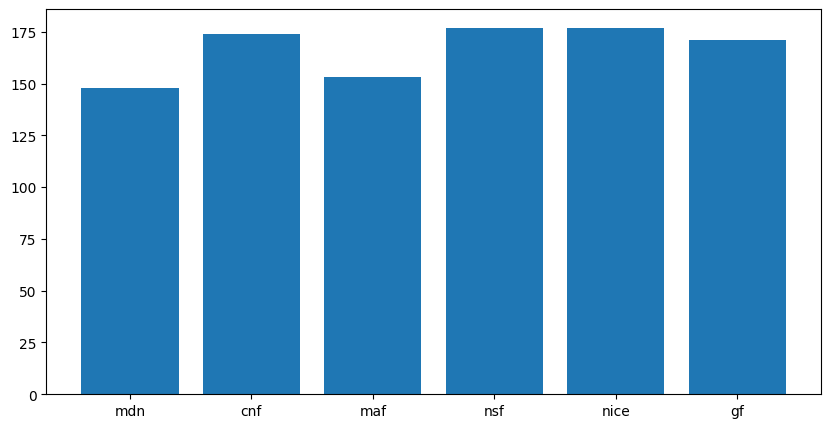

In [7]:
# barplot of the different models
freqs = {m: 0 for m in models}
for cfg in model_cfgs:
    freqs[cfg['model']] += 1
f, ax = plt.subplots(figsize=(10, 5))
ax.bar(freqs.keys(), freqs.values())

In [8]:
out_file = '../cmass/conf/net/tuning.yaml'
with open(out_file, 'w') as file:
    yaml.dump(model_cfgs, file)